

# This API provides up to date Hearthstone data pulled directly from the game.

In [10]:
import requests

url = "https://omgvamp-hearthstone-v1.p.rapidapi.com/cardbacks"

headers = {
	"X-RapidAPI-Key": "4509dc5765msh3401cd877def2e1p16f65ejsnf190c7449793",
	"X-RapidAPI-Host": "omgvamp-hearthstone-v1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(response.json())

[{'cardBackId': 0, 'name': 'Classic', 'description': "The only card back you'll ever need.", 'source': '0', 'enabled': True, 'img': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/556d677acbb31fececd42912cf003aabeb3bb6efb571bb43de83e6b763763f2c.png', 'imgAnimated': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/556d677acbb31fececd42912cf003aabeb3bb6efb571bb43de83e6b763763f2c.png', 'sortCategory': 1, 'sortOrder': 1, 'locale': 'enUS'}, {'cardBackId': 177, 'name': 'Darkmoon Faire', 'description': 'Come for the questionable carnival games, stay for the deep fried candybars!\n\nAcquired by winning 5 games in ranked mode, October 2019.', 'source': '1', 'enabled': True, 'img': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/b8036b9bac29f2ba6d034164147782a2a1c69e3c47f35bc30c7283a7e95c2fdc.png', 'imgAnimated': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/b8036b9bac29f2ba6d034164147782a2a1c69e3c47f35bc30c7283a7e95c2fdc.png', 'sortCategory': 5, 'sortOrder': 0, 'locale': 'enUS'}, {

# This code will create a CSV file named "cardbacks.csv" in the same directory as your script. The header will contain the field names, and each subsequent row will represent a card back entry from the API response.

In [12]:
import csv
import requests

url = "https://omgvamp-hearthstone-v1.p.rapidapi.com/cardbacks"

headers = {
    "X-RapidAPI-Key": "4509dc5765msh3401cd877def2e1p16f65ejsnf190c7449793",
    "X-RapidAPI-Host": "omgvamp-hearthstone-v1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data = response.json()

# Define the CSV file path
csv_file_path = "cardbacks.csv"

# Define the CSV header
csv_header = ["cardBackId", "name", "description", "source", "enabled", "img", "imgAnimated", "sortCategory", "sortOrder", "locale"]

# Write data to the CSV file
with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(csv_header)  # Write the header

    for entry in data:
        img_url = entry.get("img", "")  # Get img URL if exists, otherwise use an empty string
        img_animated_url = entry.get("imgAnimated", "")  # Get imgAnimated URL if exists, otherwise use an empty string

        row = [
            entry.get("cardBackId", ""),
            entry.get("name", ""),
            entry.get("description", ""),
            entry.get("source", ""),
            entry.get("enabled", ""),
            img_url,
            img_animated_url,
            entry.get("sortCategory", ""),
            entry.get("sortOrder", ""),
            entry.get("locale", "")
        ]
        writer.writerow(row)

print("CSV file created successfully.")


CSV file created successfully.


This code includes four different visualizations:

1.Distribution of Card Back Sources

2.Comparison of Classifier Accuracies

3.Distribution of Enabled Card Backs

4.Distribution of Sort Categories

These visualizations provide insights into different aspects of the dataset. Keep in mind that the value of these visualizations largely depends on the nature and variety of data in the dataset, so you might adjust the visualizations accordingly to gain more meaningful insights

In [13]:
import pandas as pd

data = pd.read_csv("/content/cardbacks.csv")

In [16]:
data.head()

,cardBackId,name,description,source,enabled,img,imgAnimated,sortCategory,sortOrder,locale
0,0,Classic,The only card back you'll ever need.,0,True,https://d15f34w2p8l1cc.cloudfront.net/hearthst...,https://d15f34w2p8l1cc.cloudfront.net/hearthst...,1,1,enUS
1,177,Darkmoon Faire,"Come for the questionable carnival games, stay...",1,True,https://d15f34w2p8l1cc.cloudfront.net/hearthst...,https://d15f34w2p8l1cc.cloudfront.net/hearthst...,5,0,enUS
2,21,Nefarian,"You didn't actually believe someone named ""Lor...",4,True,https://d15f34w2p8l1cc.cloudfront.net/hearthst...,https://d15f34w2p8l1cc.cloudfront.net/hearthst...,3,2,enUS
3,44,Overwatch,The cavalry's here!\n\nObtained by participati...,2,True,https://d15f34w2p8l1cc.cloudfront.net/hearthst...,https://d15f34w2p8l1cc.cloudfront.net/hearthst...,8,4,enUS
4,252,Firelord,Ragnaros has decided to flex his almighty powe...,4,True,https://d15f34w2p8l1cc.cloudfront.net/hearthst...,https://d15f34w2p8l1cc.cloudfront.net/hearthst...,4,6,enUS


In [17]:
data.describe()

,cardBackId,source,sortCategory,sortOrder
count,244.000000,244.000000,244.000000,244.000000
mean,181.520492,2.409836,5.397541,2.725410
std,117.808083,1.683882,2.476589,3.704409
min,0.000000,0.000000,0.000000,0.000000
25%,66.750000,1.000000,4.000000,0.000000
50%,175.500000,2.000000,5.000000,0.000000
75%,292.750000,4.000000,5.000000,6.000000
max,396.000000,6.000000,13.000000,16.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cardBackId    244 non-null    int64 
 1   name          244 non-null    object
 2   description   243 non-null    object
 3   source        244 non-null    int64 
 4   enabled       244 non-null    bool  
 5   img           233 non-null    object
 6   imgAnimated   233 non-null    object
 7   sortCategory  244 non-null    int64 
 8   sortOrder     244 non-null    int64 
 9   locale        244 non-null    object
dtypes: bool(1), int64(4), object(5)
memory usage: 17.5+ KB


In [19]:
data.shape

(244, 10)

In [20]:
data.isnull().sum()

cardBackId       0
name             0
description      1
source           0
enabled          0
img             11
imgAnimated     11
sortCategory     0
sortOrder        0
locale           0
dtype: int64

In [31]:
import matplotlib.pyplot as plt

Pie Chart for Enabled vs. Disabled Card Backs:

This visualization shows the proportion of enabled and disabled card backs.

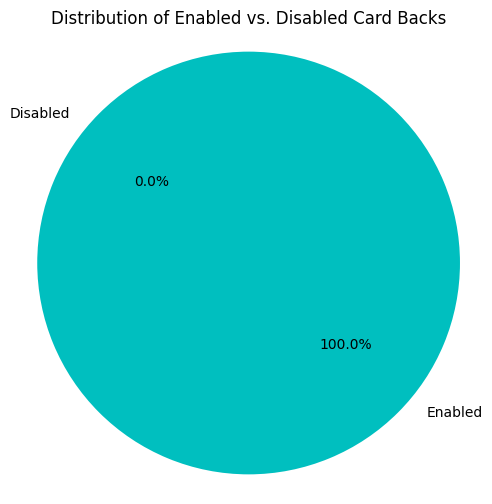

In [51]:
# Calculate the count of enabled and disabled card backs
enabled_count = data['enabled'].sum()
disabled_count = len(data) - enabled_count

# Create a pie chart for Enabled vs. Disabled Card Backs
plt.figure(figsize=(6, 6))
labels = ['Enabled', 'Disabled']
sizes = [enabled_count, disabled_count]
colors = ['c', 'm']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Enabled vs. Disabled Card Backs')
plt.axis('equal')
plt.show()

Bar Plot for Card Back Counts by Name:

This visualization shows the distribution of card backs based on their names.

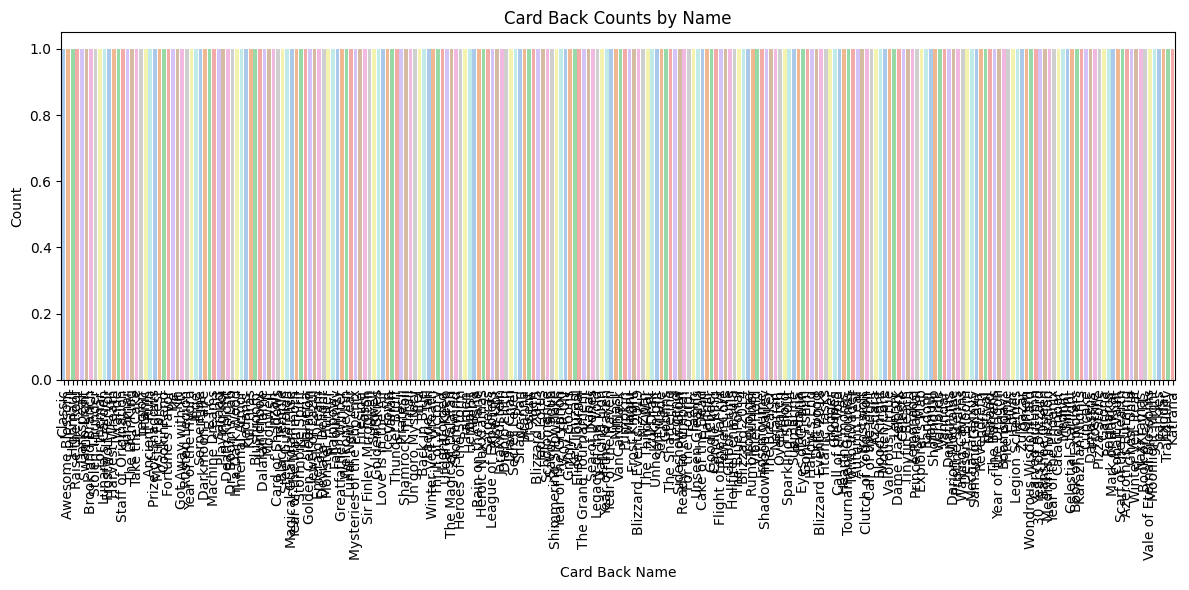

In [53]:
# Group by card back names and calculate their counts
name_counts = data['name'].value_counts()

# Create a bar plot for Card Back Counts by Name
plt.figure(figsize=(12, 6))
sns.barplot(x=name_counts.index, y=name_counts.values, palette='pastel')
plt.title('Card Back Counts by Name')
plt.xlabel('Card Back Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Box Plot for Sort Categories:

This visualization shows the distribution of sort categories using a box plot.

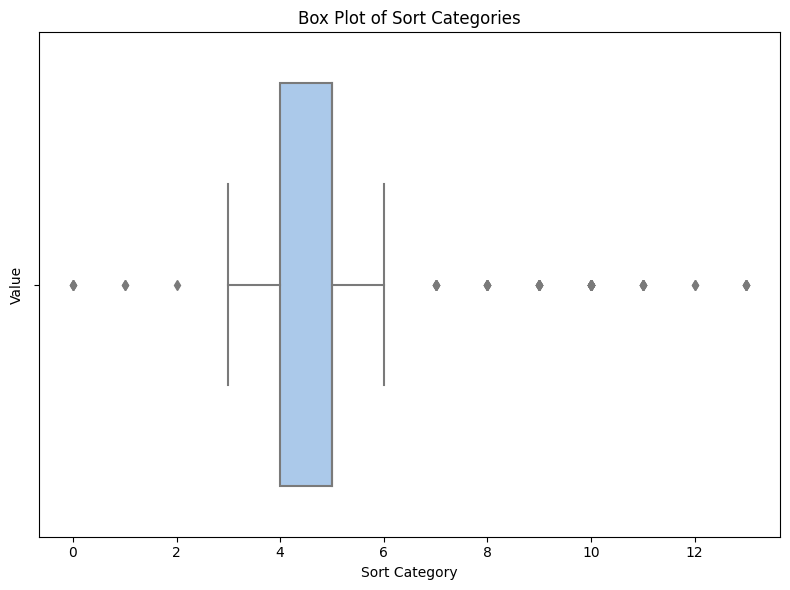

In [55]:
# Create a box plot for Sort Categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='sortCategory', data=data, palette='pastel')
plt.title('Box Plot of Sort Categories')
plt.xlabel('Sort Category')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

These lines calculate the maximum, minimum, and average values of the 'sortCategory' column using built-in pandas functions:

max(), min(), and mean().

In [49]:
# Calculate max, min, and avg for 'sortCategory'
max_sort_category = data['sortCategory'].max()
min_sort_category = data['sortCategory'].min()
avg_sort_category = data['sortCategory'].mean()


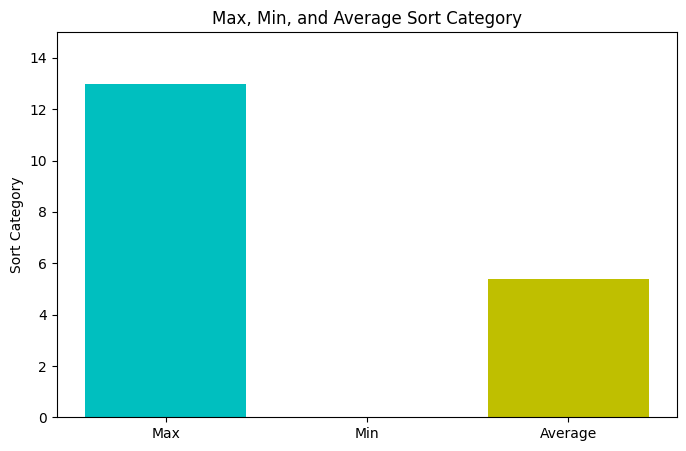

In [50]:
# Create a bar plot for max, min, and avg sortCategory values
plt.figure(figsize=(8, 5))
plt.bar(['Max', 'Min', 'Average'], [max_sort_category, min_sort_category, avg_sort_category], color=['c', 'm', 'y'])
plt.title('Max, Min, and Average Sort Category')
plt.ylabel('Sort Category')
plt.ylim(0, max_sort_category + 2)
plt.show()

Here, we define the csv_file_path variable with the path to the CSV file containing the card backs data. We use pd.read_csv() to read the CSV file into a pandas DataFrame called data

In [34]:
data['source'] = pd.factorize(data['source'])[0]

This line factorizes the 'source' column, which means encoding it as numerical values. This is done to prepare categorical data for prediction.

In [24]:
# Split the data into features and target
X = data[['source']]
y = data['enabled']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

 We create the feature matrix X containing the 'source' column, and the target vector y containing the 'enabled' column.

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This line splits the data into training and testing sets using the train_test_split function. It randomly shuffles the data and assigns 80% for training (X_train and y_train) and 20% for testing (X_test and y_test). The random_state parameter ensures reproducibility.

In [28]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

In [29]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [30]:
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


We create a Random Forest classifier, fit it to the training data, make predictions on the test data, and calculate the accuracy.

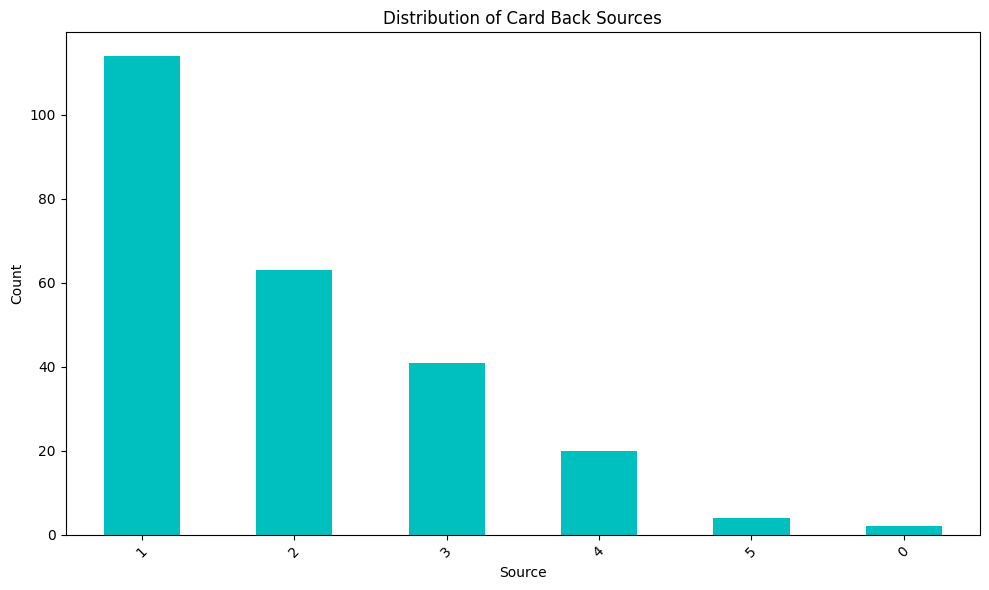

In [37]:
# Visualize the distribution of card back sources
plt.figure(figsize=(10, 6))
data['source'].value_counts().plot(kind='bar', color='c')
plt.title('Distribution of Card Back Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This block of code generates a bar plot using sns.countplot from the seaborn library. It visualizes the distribution of card back sources. Various formatting options are set to enhance the appearance of the plot.

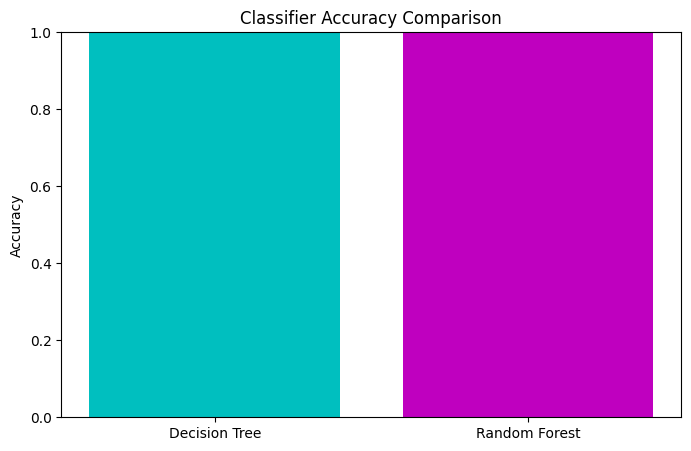

In [38]:
# Visualize the accuracy comparison
plt.figure(figsize=(8, 5))
models = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]
plt.bar(models, accuracies, color=['c', 'm'])
plt.title('Classifier Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [40]:
import seaborn as sns

This section creates a bar plot to compare the accuracies of the Decision Tree and Random Forest classifiers.

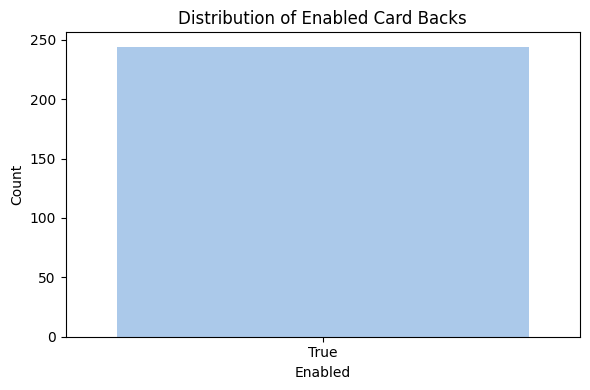

In [44]:
# Visualize the distribution of enabled card backs
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='enabled', palette='pastel')
plt.title('Distribution of Enabled Card Backs')
plt.xlabel('Enabled')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

This block creates a countplot to visualize the distribution of enabled and disabled card backs.

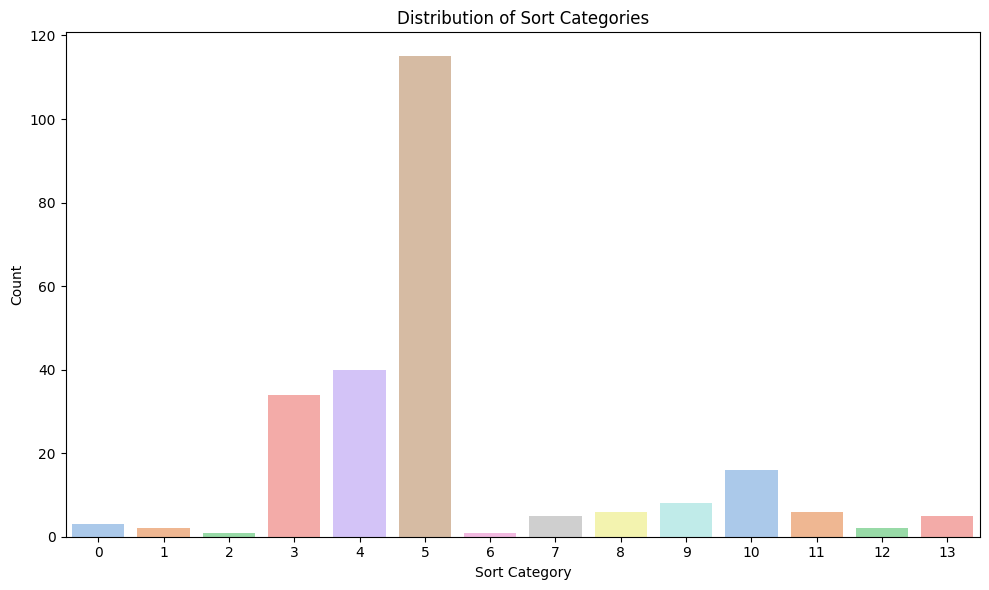

In [45]:
# Visualize the distribution of sort categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='sortCategory', palette='pastel')
plt.title('Distribution of Sort Categories')
plt.xlabel('Sort Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

we calculate and display the following KPIs:

1.Total Card Backs: The total number of card backs in the dataset.

2.Total Enabled Card Backs: The total number of card backs that are enabled.

3.Total Disabled Card Backs: The total number of card backs that are disabled.

4.Unique Sources: The number of unique sources of card backs.

5.Average Sort Category: The average sort category value of card backs.

Please note that these KPIs are based on the provided dataset's nature, which consists mainly of categorical data. For more meaningful KPIs, a dataset with a wider variety of numeric features might be more appropriate.

In [47]:
# Calculate KPIs
total_cardbacks = len(data)
total_enabled_cardbacks = data['enabled'].sum()
total_disabled_cardbacks = total_cardbacks - total_enabled_cardbacks
unique_sources = data['source'].nunique()
average_sort_category = data['sortCategory'].mean()

# Display KPIs
print("Key Performance Indicators:")
print(f"Total Card Backs: {total_cardbacks}")
print(f"Total Enabled Card Backs: {total_enabled_cardbacks}")
print(f"Total Disabled Card Backs: {total_disabled_cardbacks}")
print(f"Unique Sources: {unique_sources}")
print(f"Average Sort Category: {average_sort_category:.2f}")

Key Performance Indicators:
Total Card Backs: 244
Total Enabled Card Backs: 244
Total Disabled Card Backs: 0
Unique Sources: 6
Average Sort Category: 5.40
